### Robot initialization through serial port 

In [ ]:
import serial
ser = serial.Serial("/dev/ttyACM0")

In [ ]:
MOTOR_HOR_BASE = 2
MOTOR_VER_LOW = 5
MOTOR_VER_MID = 8
MOTOR_VER_HIGH = 14
MOTOR_EE_ROT = 15
MOTOR_EE_OPEN_CL = 9

robot_base_state = {MOTOR_HOR_BASE:1500, 
               MOTOR_VER_LOW:1500, 
               MOTOR_VER_MID:1500, 
               MOTOR_VER_HIGH:1500,
               MOTOR_EE_ROT:1500,
               MOTOR_EE_OPEN_CL:1500}

class Robot:
    def __init__(self, state, ser):
        self.current = state.copy()
        self.ser = ser
        
    def syncstate(self, step=False):
        strx = '#%dP%d'
        end = 'T600'
        base = end
        for (motor_i, state) in self.current.items():
            base=strx%(motor_i, state) + base
            print base
            if step:
                print base
                ser.write(base)
        print base
        ser.write(base)
            
    def move_delta(self, (motor, delta)):
        self.current[motor]+=delta
        

# lser.write("#2P1500#5P1500#8P1500#14P1500#15P1500T600\r\n")

### Camera Initialization

In [ ]:
import pylibcam


from matplotlib import pyplot as pl
import numpy as np


Open matplotlib in notebook mode so that we can attach keybindings to the canvas and move the robot based on the keybindings

In [ ]:
%matplotlib inline

In [ ]:
cam_1 = pylibcam.PyCamera('/dev/video0', 640, 480, 2)
cam_2 = pylibcam.PyCamera('/dev/video1', 640, 480, 2)
# cam_1.setExposure(1)
# cam_2.setExposure(1)
# cam_1.setBrightness(1)
# cam_2.setBrightness(1)


In [ ]:
img.t

In [ ]:
        print(cam_1.update(5,200))
        print(cam_2.update(5,200))
        img_1 = cam_1.toRGB()
        img_2 = cam_2.toRGB()


In [ ]:
pl.imshow(img_1)

In [ ]:


print(cam_1.update(5,200))
print(cam_2.update(5,200))
img_1 = cam_1.toRGB()
img_2 = cam_2.toRGB()


img = np.zeros((480, 640*2, 3), dtype=img_1.dtype)
img[:,:640,:] = img_1
img[:,640:,:] = img_2
pl.imshow(img)

In [ ]:

import time, sys
from IPython.core.display import clear_output
from IPython import display

f, ax = pl.subplots()

n = 30
x = np.array([i/10.0 for i in range(n)])
y = np.array([np.sin(i) for i in x])
for i in range(5,n):
    ax.plot(x[:i],y[:i])
    time.sleep(0.5)
    clear_output()
    display.display(f)
    ax.cla() # turn this off if you'd like to "build up" plots
# pl.close()


In [ ]:
cam_1.StopCam()
cam_2.StopCam()


In [ ]:
cam_2.update(5, 200)

In [ ]:
pressed_keys = set()
depressed_keys = set()
def press(event):
    global pressed_keys
    pressed_keys.add(event.key)
    
def release(event):
    global pressed_keys, depressed_keys
#     depressed_keys.add(event.key)
    pressed_keys.remove(event.key)
#     if event.key == 'x':
#         visible = xl.get_visible()
#         xl.set_visible(not visible)
#         fig.canvas.draw()


fig, ax = pl.subplots()
fig.canvas.mpl_connect('key_press_event', press)
fig.canvas.mpl_connect('key_release_event', release)

ax.imshow(img)
xl = ax.set_xlabel('x-axis')

pl.show()

In [ ]:
key_map = {
    'left': (), 'right': (),
    'up': (),   'down': (),
    '[': (),    ']': (),
    'q': (),    'w': (),
    'z': (),    'x': (),
    ';':(),     '.':()
}

In [ ]:
pressed_keys

In [ ]:
depressed_keys

In [ ]:
d2 = robot_base_state.copy()
d2[MOTOR_HOR_BASE]+=-20
d2

In [ ]:
import cv2

In [ ]:
cam1 = cv2.VideoCapture()

In [ ]:
c1 = cam1.open('/dev/video0')

In [ ]:
img = cam1.retrieve()

In [ ]:
pl.imshow(img[1])

In [ ]:
cam2 = cv2.VideoCapture()

In [ ]:
cam2.open('/dev/video1')

In [ ]:
img2 = cam2.grab()

In [ ]:
cam2.release()

In [ ]:
from collections import deque

In [1]:
%matplotlib inline

In [9]:
import urllib2

import numpy as np

In [11]:
sz = 640*480*3

In [12]:
fc = response.read(sz)

In [23]:
from matplotlib import pyplot as pl

In [30]:
from operator import mul
im_shape = (480, 640, 3)
im_sz = reduce(mul, im_shape)

def from_buffer(im_str):
    f1 = np.fromstring(im_str, dtype=np.uint8)
    return f1.reshape((480, 640, 3))    
    
def get_images():
    response=urllib2.urlopen('http://localhost:8888/')
    left = from_buffer(response.read(im_sz))
    right = from_buffer(response.read(im_sz))
    response.close()
    return left, right


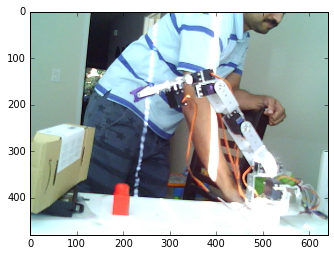

In [171]:
left, right = get_images()

pl.imshow(right)

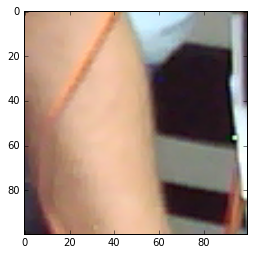

In [165]:
pl.imshow(right[200:300, 400:500])

In [68]:
import cv2

In [104]:
grasper = right[200:300, 400:500]

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from skimage import  img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

In [113]:
grasper = img_as_float(grasper)

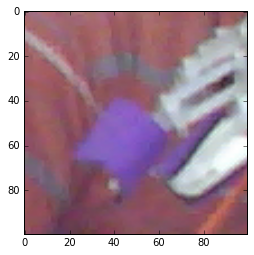

In [134]:
pl.imshow(grasper)

In [155]:
def normalize_clr(img):
    normed = np.linalg.norm(img, axis=2)
    h,w,d = img.shape
    clr_nrm = np.repeat(normed.reshape((h, w, 1)), 3, axis=2)
    unitnorm = img/clr_nrm
    return unitnorm


In [150]:
n_colors = 4
w,h,d = unitnorm.shape
imarr = np.reshape(unitnorm, (w * h, d))

image_array_sample = shuffle(imarr, random_state=0)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)


In [151]:
def recreate_image(codebook, labels, w, h, desired=None):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            clabel = labels[label_idx]
            if desired is None or clabel == desired:
                image[i][j] = codebook[clabel]
            else:
                image[i][j] = [0,0,0]
            label_idx += 1
    return image

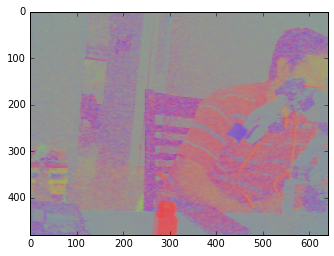

In [157]:
pl.imshow(normalize_clr(right))

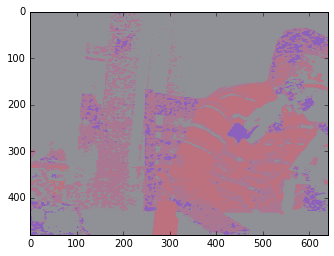

In [154]:

labels = kmeans.predict(rim)
pl.imshow( recreate_image(kmeans.cluster_centers_, labels, 480, 640))

In [108]:
rim = img_as_float(right.reshape((640*480, 3)))

In [99]:
labels.reshape((100,100))[60,60],labels.reshape((100,100))[50,50]

(6, 2)

In [101]:
kmeans.cluster_centers_[6], kmeans.cluster_centers_[2] 

(array([ 0.63714431,  0.50295994,  0.91899793]),
 array([ 0.74259452,  0.61999199,  0.98430837]))

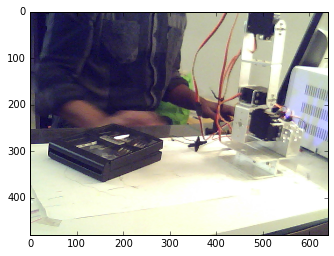

In [26]:
pl.imshow(f1.reshape((480, 640, 3)))

In [158]:
1500+500+1000

3000